# Pre TP1

In [1]:
from clustimage import Clustimage as cl
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## Importamos las imágenes

A partir del siguiente link, se obtendrán las imágenes a color de 210 flores pertenecientes a 10 especies diferentes. Cada imagen consiste en un archivo .PNG de 128 pixeles de ancho por 128 pixeles de profundidad (128x128x3). Adicionlamente, se encuentra el archivo .CSV con las etiquetas (labels) que corresponden a la especie de cada imagen.

In [2]:
#image_path = "/content/drive/MyDrive/DMCyT_2023/flower_images/" #drive
image_path = "flower_images/" #local

path = sorted([os.path.join(image_path, file)
               for file in os.listdir(image_path )
               if file.endswith('.png')])

In [3]:
labels = pd.read_csv(image_path+'flower_labels.csv')

In [4]:
labels[labels['label']==0].iloc[0,0]

'0001.png'

## Preprocesamiento de los datos
Cargar el dataset y sus respectivas etiquetas. Es importante asegurarse que las imágenes sean comparables en color, valor, rango y tamaño.

Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie

(128, 128, 3)


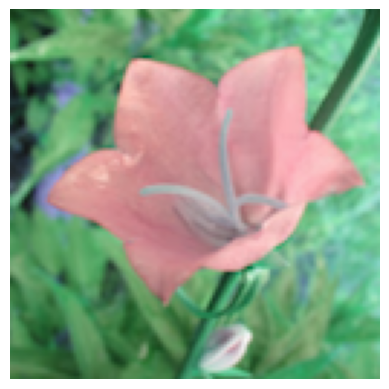

In [4]:
img = cv2.imread(image_path+labels[labels['label']==5].iloc[10,0])
print(img.shape)

plt.imshow(img)
plt.axis('off');

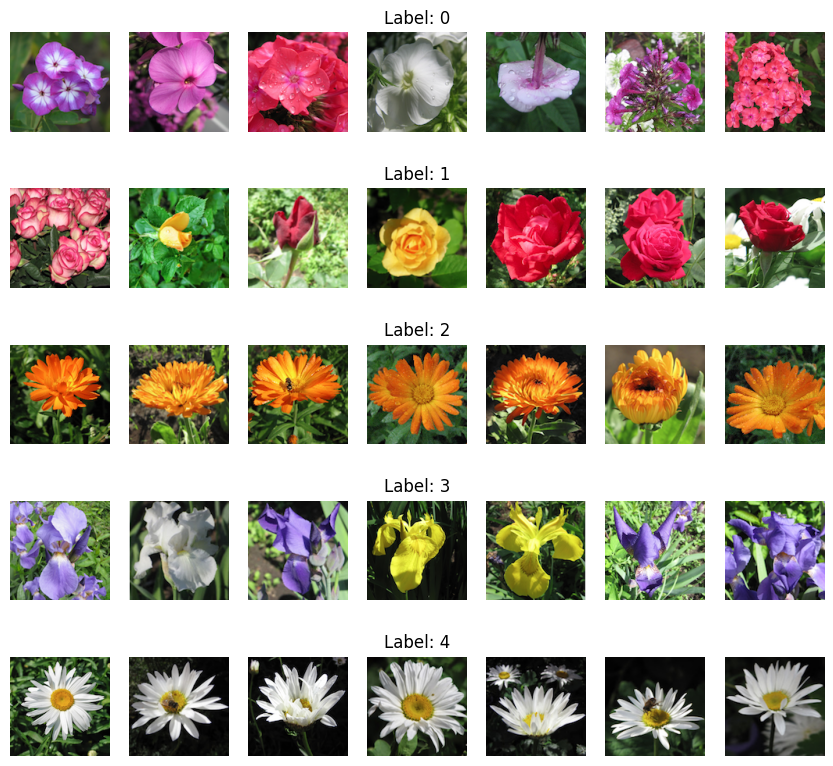

In [76]:
def print_flowers(species:list,n:int):
    fig, axs = plt.subplots(len(species), n, figsize=(n*3/2, n*7/5))
    for r,label in enumerate(species):
        photos = labels[labels['label'] == label].sample(n)
        for i in range(n):
          if i==np.floor(n/2):
            axs[r,i].set_title("Label: "+str(label))
          axs[r,i].imshow(cv2.cvtColor(cv2.imread(image_path+photos.iloc[i]['file']),cv2.COLOR_BGR2RGB))
          axs[r,i].axis('off')

    plt.show()
print_flowers(range(5),7)

## Manipulación de datos

Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

(-0.5, 127.5, 127.5, -0.5)

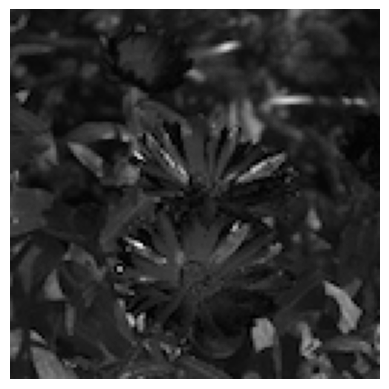

In [9]:
random.seed(42)
imagen = image_path+random.choice(labels['file'])
plt.imshow(cv2.imread(imagen)[:,:,0],cmap='gray')
plt.axis('off')

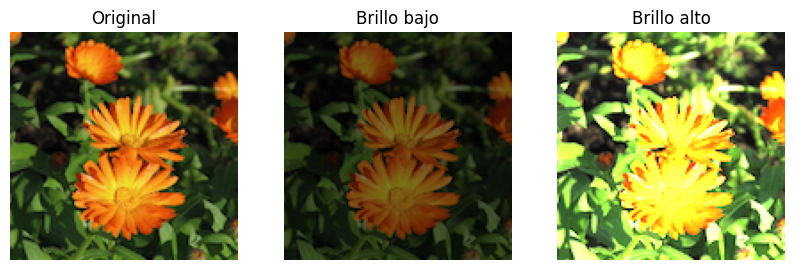

In [5]:
random.seed(42)
imagen = image_path+random.choice(labels['file'])
imagen = cv2.imread(imagen)

fig, axs = plt.subplots(1, 3, figsize=(10, 20))

imagen_original = np.clip(imagen , 0, 255).astype(np.uint8)
axs[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title("Original")

imagen_oscura = np.clip(imagen * 0.5, 0, 255).astype(np.uint8)
axs[1].imshow(cv2.cvtColor(imagen_oscura, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title("Brillo bajo")

imagen_clara = np.clip(imagen * 2.5, 0, 255).astype(np.uint8)
axs[2].imshow(cv2.cvtColor(imagen_clara, cv2.COLOR_BGR2RGB))
axs[2].axis('off')
axs[2].set_title("Brillo alto");

Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.

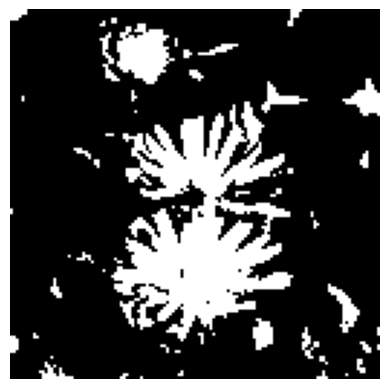

In [15]:
random.seed(42)
# read the image file
img = image_path+random.choice(labels['file'])

imagen = cv2.imread(img,cv2.IMREAD_GRAYSCALE)

# converting to its binary form
ret, bw = cv2.threshold(imagen), 127, 255, cv2.THRESH_BINARY

plt.imshow(bw,cmap='gray',vmin=0,vmax=255)
plt.axis('off');


Recortar una parte significativa de la imagen, quedándose sólo con el círculo central de la misma.

(-0.5, 127.5, 127.5, -0.5)

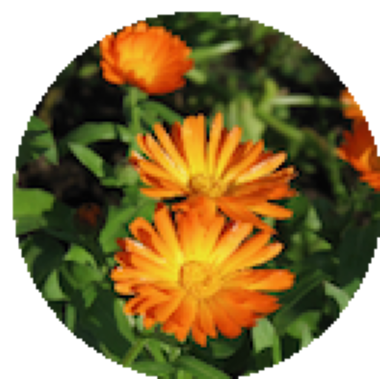

In [16]:
import numpy as np
from PIL import Image, ImageDraw

# Open the input image as numpy array, convert to RGB
random.seed(42)
imagen = image_path+random.choice(labels['file'])
img = Image.open(imagen).convert('RGB')
npImage=np.array(img)
h,w=img.size

# Create same size alpha layer with circle
alpha = Image.new('L', img.size,0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([1,1,h,w],0,360,fill=255)

# Convert alpha Image to numpy array
npAlpha=np.array(alpha)

# Add alpha layer to RGB
npImage=np.dstack((npImage,npAlpha))

plt.imshow(npImage)
#plt.imshow(imagen[50:78,50:78,:])
plt.axis('off')

Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando partes de diferentes imágenes.

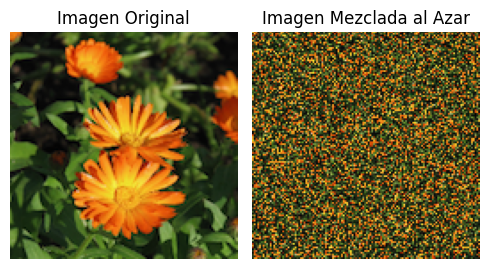

In [ ]:
# Establecer la semilla aleatoria
random.seed(42)
# Seleccionar una imagen al azar
imagen_path = image_path+ random.choice(labels['file'])
# Leer la imagen usando OpenCV
imagen = cv2.imread(imagen_path)
# Obtener las dimensiones de la imagen
alto, ancho, canales = imagen.shape
# Mezclar los índices de los píxeles al azar
indices_aleatorios = list(range(alto * ancho))
random.shuffle(indices_aleatorios)
# Reorganizar los píxeles de la imagen utilizando los índices mezclados
imagen_mezclada = imagen.reshape(-1, canales)[indices_aleatorios].reshape(alto, ancho, canales)
# Crear una figura para mostrar la imagen original y la mezclada
plt.figure(figsize=(5, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen mezclada
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_mezclada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Mezclada al Azar')
plt.axis('off')

# Ajustar el diseño de los subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

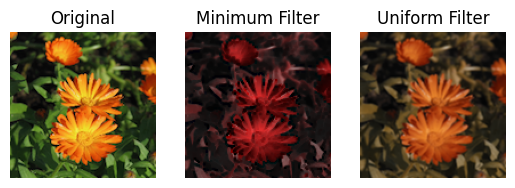

In [18]:
from scipy.ndimage import minimum_filter
from scipy.ndimage import uniform_filter

# Establecer la semilla aleatoria
random.seed(42)
# Seleccionar una imagen al azar
imagen_path = image_path + random.choice(labels['file'])

imagen = cv2.imread(imagen_path)

imagen_filtrada = minimum_filter(imagen,size=2)
imagen_filtrada_2 = uniform_filter(imagen,size=2)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Minimum Filter')
plt.subplot(1,3,3)	
plt.imshow(cv2.cvtColor(imagen_filtrada_2, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Uniform Filter')
plt.show()

Calcular imagen promedio global y el promedio entre las distintas especies. ¿Se pueden distinguir los promedios? ¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?

In [69]:
from PIL import Image

def threshold_image(image):
    # Apply thresholding to the input image
    ret, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresholded_image

def average_img_3(imlist,byn:bool=False):
    if byn==True:
        images = np.array([threshold_image(cv2.imread(fname, cv2.IMREAD_GRAYSCALE)) for fname in imlist])
    else:
        images = np.array([(np.array(cv2.cvtColor(cv2.imread(fname),cv2.COLOR_BGR2RGB))) for fname in imlist])
    # Alternative method using numpy mean function
    arr = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    #plt.imshow(arr)
    #plt.axis('off')
    out = Image.fromarray(arr)
    
    return out

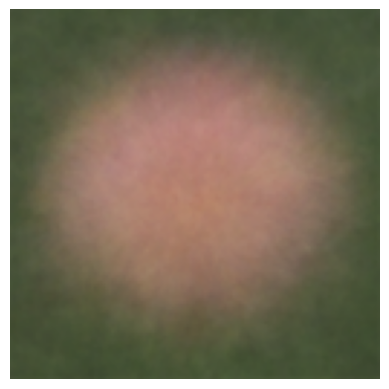

In [73]:
path_sin_208 = path.copy()
path_sin_208.pop(207)

plt.imshow(average_img_3(path_sin_208))
plt.axis('off');

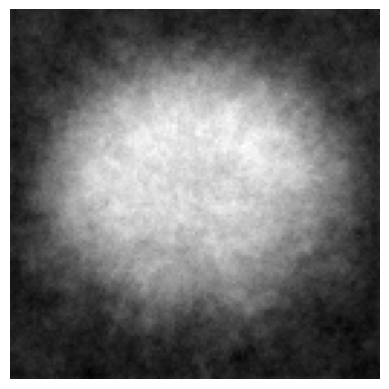

In [70]:
path_sin_208 = path.copy()
path_sin_208.pop(207)

plt.imshow(average_img_3(path_sin_208,byn=True),cmap='gray')
plt.axis('off');

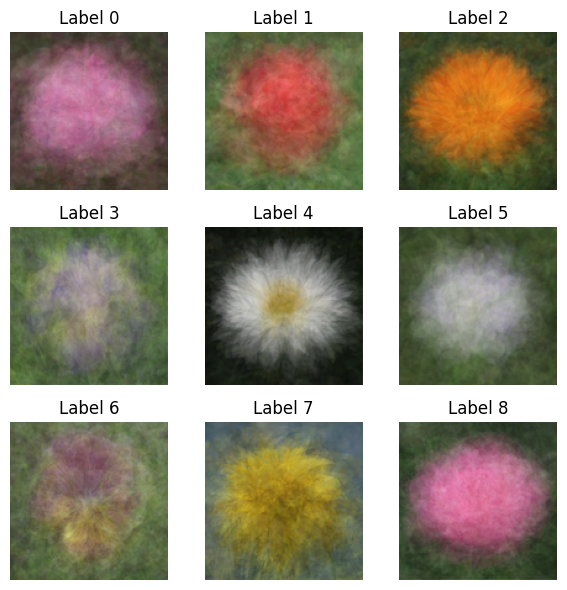

In [71]:
labels_sin_208 = labels[labels['file']!='0208.png']

# Crear una figura con 3 filas y 3 columnas para los subplots
fig, axs = plt.subplots(3, 3, figsize=(6, 6))

for label, ax in zip(range(9), axs.ravel()):
    files_for_label = labels_sin_208[labels_sin_208['label'] == label]['file'].tolist()
    images = ['flower_images/' + fname for fname in files_for_label]
    
    # Llamar a average_img_3() para calcular la imagen promedio
    avg_img = average_img_3(images)
    
    # Mostrar la imagen en el subplot correspondiente
    ax.imshow(avg_img)
    ax.set_title(f'Label {label}')
    ax.axis('off')  # Desactivar ejes para una mejor visualización

plt.tight_layout()
plt.show()

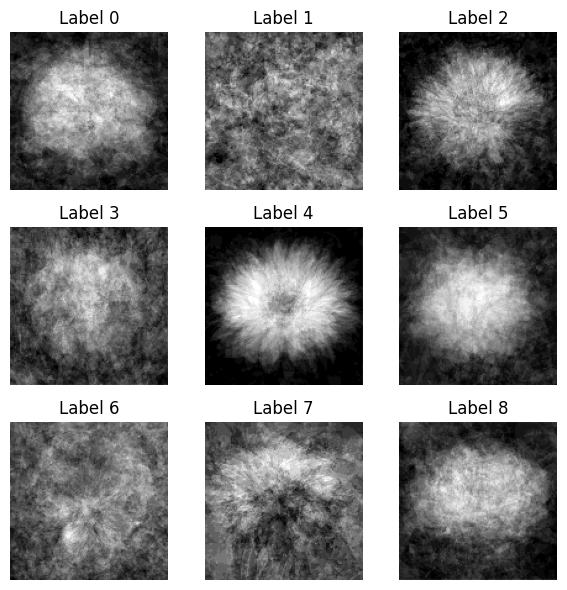

In [72]:
labels_sin_208 = labels[labels['file']!='0208.png']

# Crear una figura con 3 filas y 3 columnas para los subplots
fig, axs = plt.subplots(3, 3, figsize=(6, 6))

for label, ax in zip(range(9), axs.ravel()):
    files_for_label = labels_sin_208[labels_sin_208['label'] == label]['file'].tolist()
    images = ['flower_images/' + fname for fname in files_for_label]
    
    # Llamar a average_img_3() para calcular la imagen promedio
    avg_img = average_img_3(images,byn=True)
    
    # Mostrar la imagen en el subplot correspondiente
    ax.imshow(avg_img,cmap='gray')
    ax.set_title(f'Label {label}')
    ax.axis('off')  # Desactivar ejes para una mejor visualización

plt.tight_layout()
plt.show()

Analizar las distribuciones de valores de pixels por cada especie. ¿Se puede distinguir una especie en algún rango de color?

In [133]:
def average_img_hist(imlist):
    # Alternative method using numpy mean function
    images = np.array([(np.array(Image.open(fname))) for fname in imlist])
    arr = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    return arr

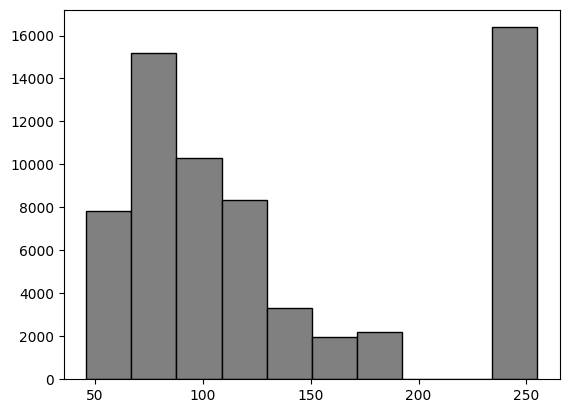

In [139]:
plt.hist(average_img_hist(path_sin_208).ravel(),color='gray',edgecolor='k');

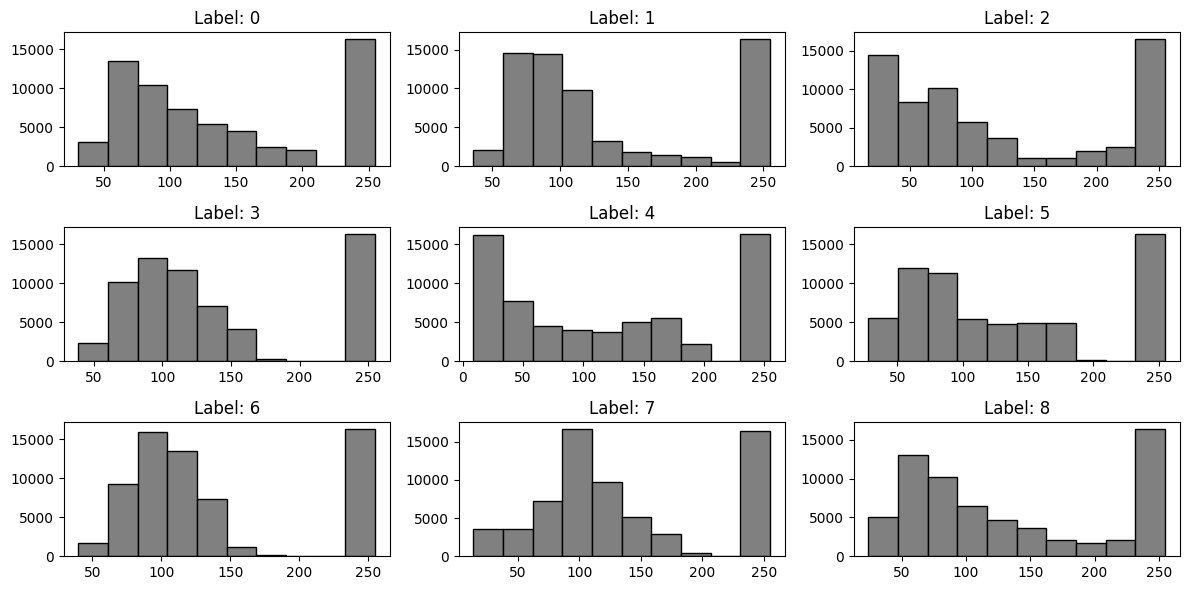

In [136]:
# Crear una figura con 3 filas y 3 columnas para los subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 6))

for label, ax in zip(range(9), axs.ravel()):
    files_for_label = labels_sin_208[labels_sin_208['label'] == label]['file'].tolist()
    images = ['flower_images/' + fname for fname in files_for_label]
    
    # Llamar a average_img_3() para calcular la imagen promedio
    arr = average_img_hist(images)
    # Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels
    ax.hist(arr.flatten(),bins=10,color='gray',edgecolor='k')
    ax.set_title(f'Label: {label}')

plt.tight_layout()
plt.show()

In [84]:
from clustimage import Clustimage
cl = Clustimage()
img = cl.imread(path[2], dim=(128,128),colorscale=1)
len(img)
imagen_color=img.reshape(128,128,3)
# plt.imshow(imagen_color)
# plt.axis('off')

colores =['red','green','blue']
for n,cs in enumerate(colores):
  monocol=imagen_color[:,:,n]
  plt.hist(monocol.flatten(),color=cs,bins=10,edgecolor='k',alpha=0.5,label=cs)
  plt.legend()

[clustimage] >INFO> filepath is set to [C:\Users\Usuario\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\Usuario\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\Usuario\AppData\Local\Temp\clustimage]


TypeError: 'Image' object is not subscriptable

Realizar una inspección de las componentes principales del dataset y analizar si se pueden identificar las especies en esta representación.

In [87]:
df = pd.DataFrame()
for a in path:
  img = cl.imread(filepath=a, dim=(128,128),colorscale=1,self=True)
  df = pd.concat([df, pd.DataFrame(img).T], ignore_index=True)
  #tmp = pd.concat([pd.DataFrame([a]), pd.DataFrame(img).T], axis=1)
  #df = pd.concat([df, tmp], ignore_index=True)

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
array_stand = sc.fit_transform(df)
pca = PCA()
pca_data = pca.fit_transform(array_stand)
df_pca = pd.DataFrame(pca_data)

Realizar una inspección de las componentes principales del dataset y analizar si se pueden identificar las especies en esta representación

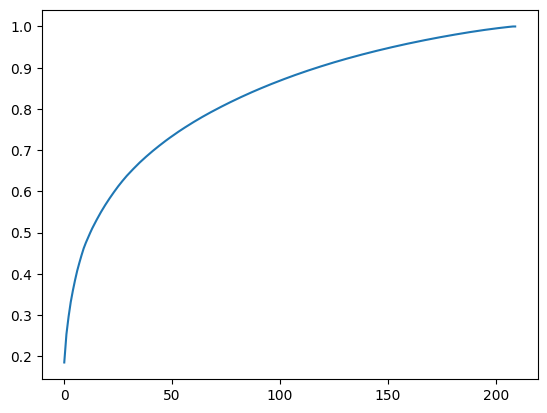

In [93]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

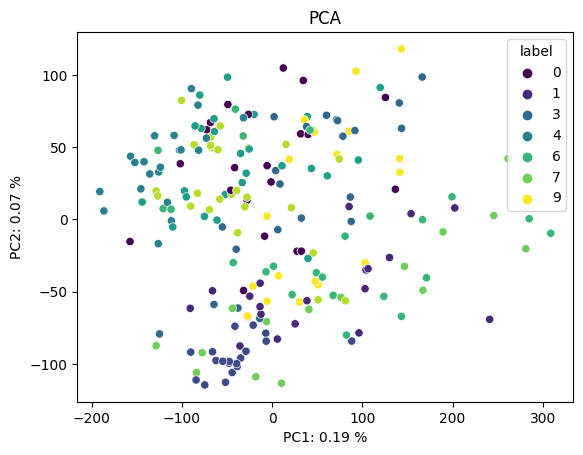

In [138]:
import seaborn as sns
graficos = pd.concat((labels,df_pca),axis=1)

sns.scatterplot(data=graficos,x=0,y=1,hue='label',palette='viridis')
plt.title("PCA")
plt.xlabel(f"PC1: {pca.explained_variance_ratio_[0].round(2)} %")
plt.ylabel(f"PC2: {pca.explained_variance_ratio_[1].round(2)} %");